In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Preprocess Tweet Datasets

Concatanate all tweets datasets

In [2]:
import os
import glob
import pandas as pd
os.chdir("/content/drive/My Drive/243/FakeNewsNet/dataset/tweets")

In [3]:
extension = 'csv'
all_filenames = ["/content/drive/My Drive/243/FakeNewsNet/dataset/tweets/" + i for i in glob.glob('*.{}'.format(extension))]

In [4]:
len(all_filenames)

39

In [5]:
combined_csv = pd.concat([pd.read_csv(f,lineterminator='\n').reset_index(drop=True) for f in all_filenames],axis=0,ignore_index=True)

In [6]:
bool_series = pd.isnull(combined_csv["Quote"]) 
combined_csv['null'] = bool_series
for i in range(len(combined_csv)):
  if combined_csv['null'][i]:
    combined_csv['Quote'][i] = combined_csv['Quote\r'][i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [7]:
combined_csv

,Id,Tweet_Id,Datetime,Text,Retweet,Like,Reply,Quote,Quote\r,source,number_tweets,fake_news,null
0,2493749932,284329075902926848,2012-12-27 16:05:08+00:00,Did Miley Cyrus and Liam Hemsworth secretly ge...,0,0,0,0.0,NaN,NaN,NaN,NaN,False
1,2493749932,284332744559968256,2012-12-27 16:19:43+00:00,Did Miley Cyrus and Liam Hemsworth secretly ge...,0,0,0,0.0,NaN,NaN,NaN,NaN,False
2,2493749932,284335412590297089,2012-12-27 16:30:19+00:00,Did Miley Cyrus and Liam Hemsworth secretly ge...,0,0,0,0.0,NaN,NaN,NaN,NaN,False
3,2493749932,284359918792880128,2012-12-27 18:07:42+00:00,Afternoon Tea – Daily Link Roundup: Did Miley ...,0,0,0,0.0,NaN,NaN,NaN,NaN,False
4,2493749932,284385385151332353,2012-12-27 19:48:54+00:00,Did Miley Cyrus and Liam Hemsworth secretly ge...,0,0,0,0.0,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4395331,671,1071555101234475009,2018-12-09 00:00:19,Listen to this fantastic speech by Missouri St...,0,0,0,NaN,NaN,politifact,11714.0,1.0,True
4395332,671,1071555111435071488,2018-12-09 00:00:21,Listen to this fantastic speech by Missouri St...,1,1,0,NaN,NaN,politifact,11714.0,1.0,True
4395333,671,1071555140052754432,2018-12-09 00:00:28,Listen to this fantastic speech by Missouri St...,0,0,0,NaN,NaN,politifact,11714.0,1.0,True
4395334,671,1071566460634443776,2018-12-09 00:45:27,"The one deserving dues is this #columnist, @pe...",0,1,1,NaN,NaN,politifact,11714.0,1.0,True


In [8]:
clean_csv = pd.DataFrame()
clean_csv = combined_csv.iloc[:,:7]

In [9]:
clean_csv

,Id,Tweet_Id,Datetime,Text,Retweet,Like,Reply
0,2493749932,284329075902926848,2012-12-27 16:05:08+00:00,Did Miley Cyrus and Liam Hemsworth secretly ge...,0,0,0
1,2493749932,284332744559968256,2012-12-27 16:19:43+00:00,Did Miley Cyrus and Liam Hemsworth secretly ge...,0,0,0
2,2493749932,284335412590297089,2012-12-27 16:30:19+00:00,Did Miley Cyrus and Liam Hemsworth secretly ge...,0,0,0
3,2493749932,284359918792880128,2012-12-27 18:07:42+00:00,Afternoon Tea – Daily Link Roundup: Did Miley ...,0,0,0
4,2493749932,284385385151332353,2012-12-27 19:48:54+00:00,Did Miley Cyrus and Liam Hemsworth secretly ge...,0,0,0
...,...,...,...,...,...,...,...
4395331,671,1071555101234475009,2018-12-09 00:00:19,Listen to this fantastic speech by Missouri St...,0,0,0
4395332,671,1071555111435071488,2018-12-09 00:00:21,Listen to this fantastic speech by Missouri St...,1,1,0
4395333,671,1071555140052754432,2018-12-09 00:00:28,Listen to this fantastic speech by Missouri St...,0,0,0
4395334,671,1071566460634443776,2018-12-09 00:45:27,"The one deserving dues is this #columnist, @pe...",0,1,1


Add tweet hours and tweet days

In [10]:
clean_csv['Datetime'] = clean_csv['Datetime'].apply(lambda x: x.replace('+00:00',''))

In [11]:
import datetime
from datetime import datetime
clean_csv['Datetime'] = clean_csv['Datetime'].apply(lambda x: datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))

In [12]:
clean_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4395336 entries, 0 to 4395335
Data columns (total 7 columns):
 #   Column    Dtype         
---  ------    -----         
 0   Id        int64         
 1   Tweet_Id  int64         
 2   Datetime  datetime64[ns]
 3   Text      object        
 4   Retweet   int64         
 5   Like      int64         
 6   Reply     int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 234.7+ MB


In [ ]:
clean_csv

,Id,Tweet_Id,Datetime,Text,Retweet,Like,Reply
0,2493749932,284329075902926848,2012-12-27 16:05:08,Did Miley Cyrus and Liam Hemsworth secretly ge...,0,0,0
1,2493749932,284332744559968256,2012-12-27 16:19:43,Did Miley Cyrus and Liam Hemsworth secretly ge...,0,0,0
2,2493749932,284335412590297089,2012-12-27 16:30:19,Did Miley Cyrus and Liam Hemsworth secretly ge...,0,0,0
3,2493749932,284359918792880128,2012-12-27 18:07:42,Afternoon Tea – Daily Link Roundup: Did Miley ...,0,0,0
4,2493749932,284385385151332353,2012-12-27 19:48:54,Did Miley Cyrus and Liam Hemsworth secretly ge...,0,0,0
...,...,...,...,...,...,...,...
1571025,11208,1059493983548653568,2018-11-05 17:13:44,A comprehensive investigation of voter imperso...,0,0,0
1571026,11208,1059527997928157185,2018-11-05 19:28:54,From 2014: A comprehensive investigation of vo...,0,1,1
1571027,11208,1059541085398155265,2018-11-05 20:20:54,A comprehensive investigation of voter imperso...,0,0,0
1571028,11208,1060959628127653888,2018-11-09 18:17:41,Can we dust of this study to remind #trump the...,0,1,0


Combined with main dataset

In [ ]:
df = pd.read_csv("/content/drive/My Drive/243/FakeNewsNet/dataset/dataframe_text_no_tweets_v2.csv")

In [ ]:
# only retain relevant columns for data analysis
df.drop(['Unnamed: 0', 'news_url', 'source_url', 'title','publish_date', 'body','tweet_ids'], axis = 1, inplace = True)

In [ ]:
tweet_df = clean_csv.merge(df, left_on = "Id", right_on = "id", how = 'left')

In [ ]:
tweet_df.dropna(inplace = True)
tweet_df.drop(['id'], axis = 1, inplace = True)

In [ ]:
tweet_df.rename(columns={"target": "fake_news"},inplace = True)
tweet_df['fake_news'] = tweet_df['fake_news'].astype(int)

In [ ]:
tweet_df

,Id,Tweet_Id,Datetime,Text,Retweet,Like,Reply,source,number_tweets,fake_news
0,2493749932,284329075902926848,2012-12-27 16:05:08,Did Miley Cyrus and Liam Hemsworth secretly ge...,0,0,0,gossipcop,97.0,0
1,2493749932,284332744559968256,2012-12-27 16:19:43,Did Miley Cyrus and Liam Hemsworth secretly ge...,0,0,0,gossipcop,97.0,0
2,2493749932,284335412590297089,2012-12-27 16:30:19,Did Miley Cyrus and Liam Hemsworth secretly ge...,0,0,0,gossipcop,97.0,0
3,2493749932,284359918792880128,2012-12-27 18:07:42,Afternoon Tea – Daily Link Roundup: Did Miley ...,0,0,0,gossipcop,97.0,0
4,2493749932,284385385151332353,2012-12-27 19:48:54,Did Miley Cyrus and Liam Hemsworth secretly ge...,0,0,0,gossipcop,97.0,0
...,...,...,...,...,...,...,...,...,...,...
1568509,671,1071555101234475009,2018-12-09 00:00:19,Listen to this fantastic speech by Missouri St...,0,0,0,politifact,11714.0,1
1568510,671,1071555111435071488,2018-12-09 00:00:21,Listen to this fantastic speech by Missouri St...,1,1,0,politifact,11714.0,1
1568511,671,1071555140052754432,2018-12-09 00:00:28,Listen to this fantastic speech by Missouri St...,0,0,0,politifact,11714.0,1
1568512,671,1071566460634443776,2018-12-09 00:45:27,"The one deserving dues is this #columnist, @pe...",0,1,1,politifact,11714.0,1


In [ ]:
tweet_df.to_csv('/content/drive/My Drive/243/FakeNewsNet/dataset/tweets/tweets_merged.csv', index=False)

# Tweet Data Analysis

Part 1. Real vs Fake news tweet time for both politicfact and gossip cop datasets

In [ ]:
tweet_copy = tweet_df.copy()

In [ ]:
# Extract hour and weekday from tweet posting datetime
tweet_copy['Hour'] = tweet_copy['Datetime'].apply(lambda x: x.hour)
tweet_copy['Weekday'] = tweet_copy.Datetime.dt.dayofweek  # Which day of the corresponding day of the each week

In [ ]:
tweet_copy.head()

,Id,Tweet_Id,Datetime,Text,Retweet,Like,Reply,source,number_tweets,fake_news,Hour,Weekday
0,2493749932,284329075902926848,2012-12-27 16:05:08,Did Miley Cyrus and Liam Hemsworth secretly ge...,0,0,0,gossipcop,97.0,0,16,3
1,2493749932,284332744559968256,2012-12-27 16:19:43,Did Miley Cyrus and Liam Hemsworth secretly ge...,0,0,0,gossipcop,97.0,0,16,3
2,2493749932,284335412590297089,2012-12-27 16:30:19,Did Miley Cyrus and Liam Hemsworth secretly ge...,0,0,0,gossipcop,97.0,0,16,3
3,2493749932,284359918792880128,2012-12-27 18:07:42,Afternoon Tea – Daily Link Roundup: Did Miley ...,0,0,0,gossipcop,97.0,0,18,3
4,2493749932,284385385151332353,2012-12-27 19:48:54,Did Miley Cyrus and Liam Hemsworth secretly ge...,0,0,0,gossipcop,97.0,0,19,3


In [ ]:
tweet_copy.columns
tweet_copy.drop(['Id', 'Datetime', 'Text', 'Retweet', 'Like', 'Reply','number_tweets'], axis = 1, inplace = True)

In [ ]:
# consists of all real news
real_tweet = pd.DataFrame()
real_tweet = tweet_copy.loc[tweet_copy['fake_news']==0]
real_tweet.drop(['fake_news','source'], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
#only consists of real news from politifact
p_real_tweet = pd.DataFrame()
p_real_tweet = tweet_copy.loc[(tweet_copy['source'] == 'politifact') & (tweet_copy['fake_news']==0)]
p_real_tweet.drop(['fake_news','source'], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
#only consists of real news from gossipcop
g_real_tweet = pd.DataFrame()
g_real_tweet = tweet_copy.loc[(tweet_copy['source'] == 'gossipcop') & (tweet_copy['fake_news']==0)]
g_real_tweet.drop(['fake_news','source'], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
#only consists of fake news
fake_tweet = pd.DataFrame()
fake_tweet = tweet_copy.loc[tweet_copy['fake_news']==1]
fake_tweet.drop(['fake_news','source'], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
#only consists of fake news from politifact
p_fake_tweet = pd.DataFrame()
p_fake_tweet = tweet_copy.loc[(tweet_copy['source'] == 'politifact') & (tweet_copy['fake_news']==1)]
p_fake_tweet.drop(['fake_news','source'], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
#only consists of fake news from gossipcop
g_fake_tweet = pd.DataFrame()
g_fake_tweet = tweet_copy.loc[(tweet_copy['source'] == 'gossipcop') & (tweet_copy['fake_news']==1)]
g_fake_tweet.drop(['fake_news','source'], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
weekday_dic = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

real_tweet['Weekday'] = real_tweet['Weekday'].apply(lambda x: weekday_dic[x] )
fake_tweet['Weekday'] = fake_tweet['Weekday'].apply(lambda x: weekday_dic[x] )

p_real_tweet['Weekday'] = p_real_tweet['Weekday'].apply(lambda x: weekday_dic[x] )
p_fake_tweet['Weekday'] = p_fake_tweet['Weekday'].apply(lambda x: weekday_dic[x] )

g_real_tweet['Weekday'] = g_real_tweet['Weekday'].apply(lambda x: weekday_dic[x] )
g_fake_tweet['Weekday'] = g_fake_tweet['Weekday'].apply(lambda x: weekday_dic[x] )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
real = real_tweet.groupby(['Hour','Weekday']).count().reset_index()
fake = fake_tweet.groupby(['Hour','Weekday']).count().reset_index()

p_real = p_real_tweet.groupby(['Hour','Weekday']).count().reset_index()
p_fake = p_fake_tweet.groupby(['Hour','Weekday']).count().reset_index()

g_real = g_real_tweet.groupby(['Hour','Weekday']).count().reset_index()
g_fake = g_fake_tweet.groupby(['Hour','Weekday']).count().reset_index()

In [ ]:
real.rename(columns = {'Tweet_Id':'Counts'},inplace = True)
fake.rename(columns = {'Tweet_Id':'Counts'},inplace = True)

p_real.rename(columns = {'Tweet_Id':'Counts'},inplace = True)
p_fake.rename(columns = {'Tweet_Id':'Counts'},inplace = True)

g_real.rename(columns = {'Tweet_Id':'Counts'},inplace = True)
g_fake.rename(columns = {'Tweet_Id':'Counts'},inplace = True)

In [ ]:
real.head()

,Hour,Weekday,Counts
0,0,Friday,3136
1,0,Monday,3348
2,0,Saturday,2816
3,0,Sunday,2450
4,0,Thursday,3008


In [ ]:
# pivot the table
real_cnt = real.pivot(index='Weekday', columns='Hour')
real_cnt.columns = [col[1] if type(col) is tuple else col for col in real_cnt.columns.values]
fake_cnt = fake.pivot(index='Weekday', columns='Hour')
fake_cnt.columns = [col[1] if type(col) is tuple else col for col in fake_cnt.columns.values]

p_real_cnt = p_real.pivot(index='Weekday', columns='Hour')
p_real_cnt.columns = [col[1] if type(col) is tuple else col for col in p_real_cnt.columns.values]
p_fake_cnt = p_fake.pivot(index='Weekday', columns='Hour')
p_fake_cnt.columns = [col[1] if type(col) is tuple else col for col in p_fake_cnt.columns.values]

g_real_cnt = g_real.pivot(index='Weekday', columns='Hour')
g_real_cnt.columns = [col[1] if type(col) is tuple else col for col in g_real_cnt.columns.values]
g_fake_cnt = g_fake.pivot(index='Weekday', columns='Hour')
g_fake_cnt.columns = [col[1] if type(col) is tuple else col for col in g_fake_cnt.columns.values]

In [ ]:
real_cnt

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Weekday,,,,,,,,,,,,,,,,,,,,,,,,
Friday,3136,3135,2770,2584,2260,1856,1686,1745,1530,1603,1811,2232,2944,3078,3468,3331,3692,3789,3375,3244,3830,3262,2990,2966
Monday,3348,3335,3122,3116,2727,2203,1900,1847,1710,1885,1967,2636,3111,3658,3978,4657,4697,4463,4478,5071,4510,4515,4482,4380
Saturday,2816,2739,2469,2511,2143,1981,1680,1727,1795,1551,1490,1669,2025,2161,2453,2711,2761,2882,2889,2951,2664,2782,2192,2292
Sunday,2450,2587,2723,2375,2262,1756,1682,1557,1494,1362,1901,2190,2007,2332,2817,2869,2862,2584,2738,2970,2980,2910,2868,2891
Thursday,3008,2966,3170,2844,2165,1769,1598,1607,1425,1522,1676,2062,2510,3065,3330,3871,3942,3795,3654,3665,3576,3587,3490,2878
Tuesday,4279,3824,3789,3358,2710,2521,1944,2550,2105,2083,1957,2221,2857,3185,3767,4097,4161,4285,3876,3610,3752,3382,3358,3657
Wednesday,3076,3531,3270,2697,2572,2024,1819,2112,1794,1681,2141,2346,3855,3248,3560,4030,3838,4464,4276,4116,4075,3834,3994,3113


In [ ]:
hour_dic = {0: '12AM',1:'1AM', 2:'2AM', 3:'3AM', 4:'4AM',5:'5AM', 
            6: '6AM',7:'7AM', 8:'8AM', 9:'9AM', 10:'10AM',11:'11AM',
            12: '12PM', 13:'1PM', 14:'2PM', 15:'3PM', 16:'4PM',17:'5PM', 
            18: '6PM',19:'7PM', 20:'8PM', 21:'9PM', 22:'10PM', 23:'11PM'}
real_cnt.rename(columns=hour_dic,inplace = True)
fake_cnt.rename(columns=hour_dic,inplace = True)

p_real_cnt.rename(columns=hour_dic,inplace = True)
p_fake_cnt.rename(columns=hour_dic,inplace = True)

g_real_cnt.rename(columns=hour_dic,inplace = True)
g_fake_cnt.rename(columns=hour_dic,inplace = True)

In [ ]:
column_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

real_cnt = real_cnt.reindex(column_order, axis=0)
fake_cnt = fake_cnt.reindex(column_order, axis=0)

p_real_cnt = p_real_cnt.reindex(column_order, axis=0)
p_fake_cnt = p_fake_cnt.reindex(column_order, axis=0)

g_real_cnt = g_real_cnt.reindex(column_order, axis=0)
g_fake_cnt = g_fake_cnt.reindex(column_order, axis=0)

In [ ]:
real_cnt

,12AM,1AM,2AM,3AM,4AM,5AM,6AM,7AM,8AM,9AM,10AM,11AM,12PM,1PM,2PM,3PM,4PM,5PM,6PM,7PM,8PM,9PM,10PM,11PM
Weekday,,,,,,,,,,,,,,,,,,,,,,,,
Monday,3348,3335,3122,3116,2727,2203,1900,1847,1710,1885,1967,2636,3111,3658,3978,4657,4697,4463,4478,5071,4510,4515,4482,4380
Tuesday,4279,3824,3789,3358,2710,2521,1944,2550,2105,2083,1957,2221,2857,3185,3767,4097,4161,4285,3876,3610,3752,3382,3358,3657
Wednesday,3076,3531,3270,2697,2572,2024,1819,2112,1794,1681,2141,2346,3855,3248,3560,4030,3838,4464,4276,4116,4075,3834,3994,3113
Thursday,3008,2966,3170,2844,2165,1769,1598,1607,1425,1522,1676,2062,2510,3065,3330,3871,3942,3795,3654,3665,3576,3587,3490,2878
Friday,3136,3135,2770,2584,2260,1856,1686,1745,1530,1603,1811,2232,2944,3078,3468,3331,3692,3789,3375,3244,3830,3262,2990,2966
Saturday,2816,2739,2469,2511,2143,1981,1680,1727,1795,1551,1490,1669,2025,2161,2453,2711,2761,2882,2889,2951,2664,2782,2192,2292
Sunday,2450,2587,2723,2375,2262,1756,1682,1557,1494,1362,1901,2190,2007,2332,2817,2869,2862,2584,2738,2970,2980,2910,2868,2891


In [ ]:
p_real_cnt

,12AM,1AM,2AM,3AM,4AM,5AM,6AM,7AM,8AM,9AM,10AM,11AM,12PM,1PM,2PM,3PM,4PM,5PM,6PM,7PM,8PM,9PM,10PM,11PM
Weekday,,,,,,,,,,,,,,,,,,,,,,,,
Monday,743,714,762,794,554,461,350,295,277,369,344,441,735,873,907,991,1074,1062,846,1472,977,763,769,721
Tuesday,696,621,797,743,675,483,391,431,397,402,446,559,703,877,927,1022,1343,1393,1080,988,1067,1074,1025,961
Wednesday,871,908,802,837,761,557,506,622,420,384,527,552,1635,703,720,845,884,988,879,829,829,877,831,781
Thursday,795,729,778,820,618,472,385,348,304,281,370,501,763,855,982,1012,1130,1048,961,995,1014,1093,1055,938
Friday,954,950,852,785,622,453,409,514,317,333,404,541,774,889,859,885,989,1111,932,922,1441,994,852,679
Saturday,713,601,555,577,520,423,388,317,300,274,240,369,510,519,625,675,702,797,710,725,752,658,595,698
Sunday,909,1023,964,868,785,644,592,587,505,434,896,1101,704,678,764,731,708,554,592,678,720,721,717,731


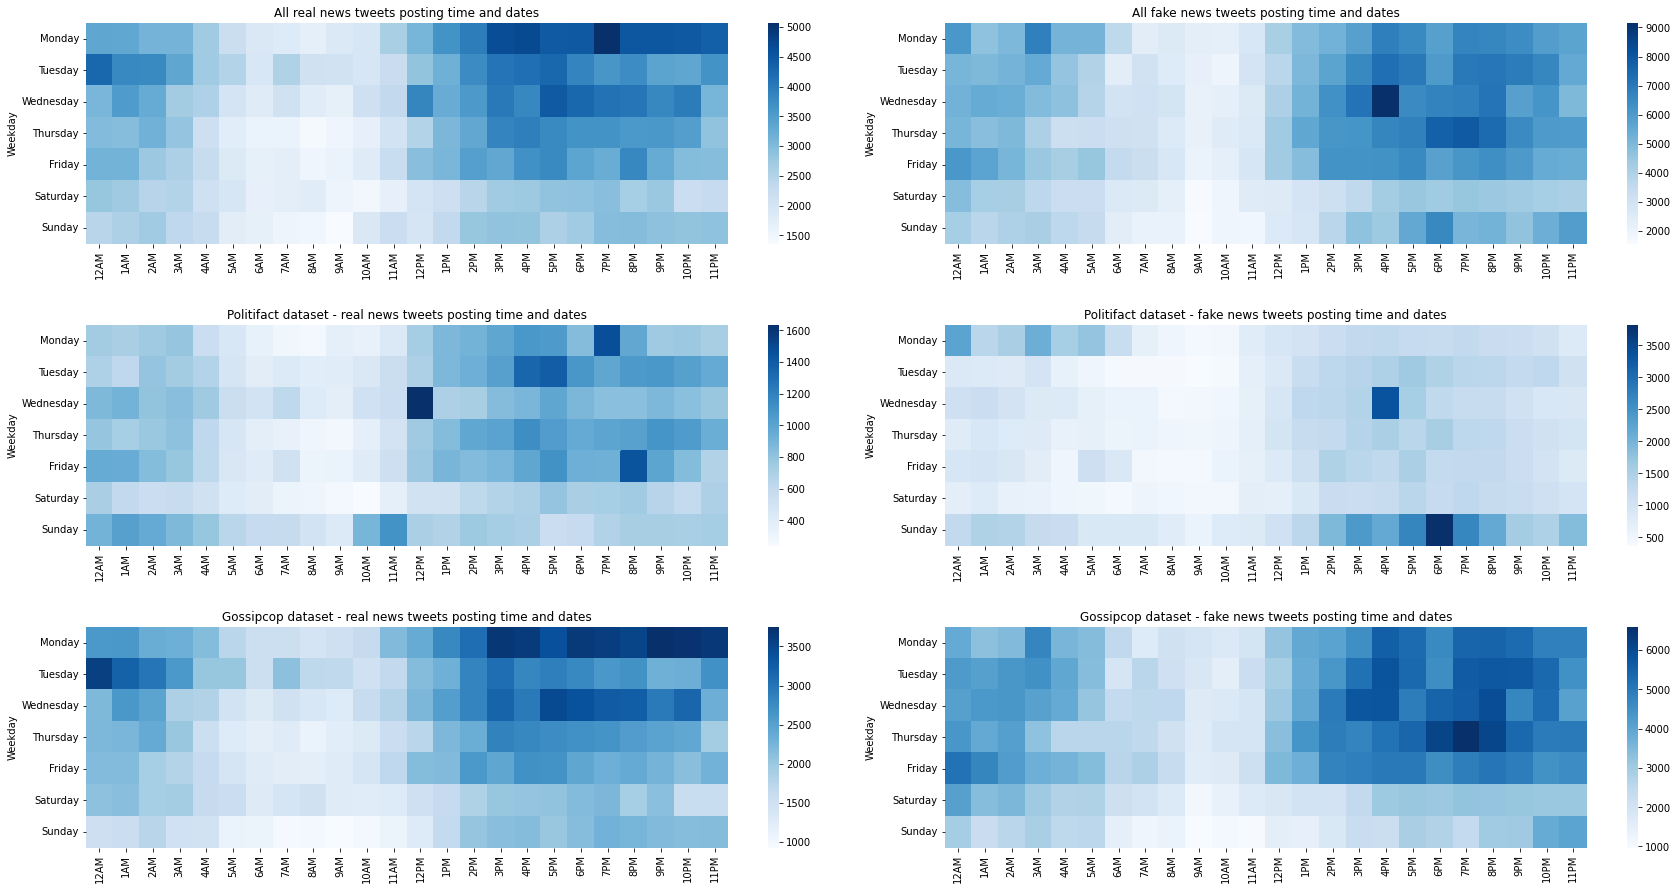

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(25, 13))
ax1=plt.subplot(321)
sns.heatmap(real_cnt,cmap="Blues")
ax1.set_title("All real news tweets posting time and dates")


ax2=plt.subplot(322)
sns.heatmap(fake_cnt,cmap="Blues")
ax2.set_title("All fake news tweets posting time and dates")

ax3=plt.subplot(323)
sns.heatmap(p_real_cnt,cmap="Blues")
ax3.set_title("Politifact dataset - real news tweets posting time and dates")

ax4=plt.subplot(324)
sns.heatmap(p_fake_cnt,cmap="Blues")
ax4.set_title("Politifact dataset - fake news tweets posting time and dates")

ax5=plt.subplot(325)
sns.heatmap(g_real_cnt,cmap="Blues")
ax5.set_title("Gossipcop dataset - real news tweets posting time and dates")

ax6=plt.subplot(326)
sns.heatmap(g_fake_cnt,cmap="Blues")
ax6.set_title("Gossipcop dataset - fake news tweets posting time and dates")

fig.tight_layout(pad=3.0)

plt.show()

Part 2. User activity 

In [ ]:
tweet_copy1 = tweet_df.copy()

In [ ]:
tweet_copy1.head()

,Id,Tweet_Id,Datetime,Text,Retweet,Like,Reply,source,number_tweets,fake_news
0,2493749932,284329075902926848,2012-12-27 16:05:08,Did Miley Cyrus and Liam Hemsworth secretly ge...,0,0,0,gossipcop,97.0,0
1,2493749932,284332744559968256,2012-12-27 16:19:43,Did Miley Cyrus and Liam Hemsworth secretly ge...,0,0,0,gossipcop,97.0,0
2,2493749932,284335412590297089,2012-12-27 16:30:19,Did Miley Cyrus and Liam Hemsworth secretly ge...,0,0,0,gossipcop,97.0,0
3,2493749932,284359918792880128,2012-12-27 18:07:42,Afternoon Tea – Daily Link Roundup: Did Miley ...,0,0,0,gossipcop,97.0,0
4,2493749932,284385385151332353,2012-12-27 19:48:54,Did Miley Cyrus and Liam Hemsworth secretly ge...,0,0,0,gossipcop,97.0,0


In [ ]:
tweet_copy1.columns
tweet_copy1.drop(['Tweet_Id', 'Datetime', 'Text','number_tweets'], axis = 1, inplace = True)

In [ ]:
p_tweets = tweet_copy1.loc[tweet_copy1['source'] == 'politifact'].groupby(['Id','fake_news']).sum().reset_index()
g_tweets = tweet_copy1.loc[tweet_copy1['source'] == 'gossipcop'].groupby(['Id','fake_news']).sum().reset_index()

In [ ]:
p_tweets['fake_news']=p_tweets['fake_news'].astype(object)
g_tweets['fake_news']=g_tweets['fake_news'].astype(object)

In [ ]:
fig1 = px.scatter_ternary(p_tweets, a="Retweet", b="Reply", c="Like",color='fake_news',template="none",title="User activities for politifact news tweets")
fig2 = px.scatter_ternary(g_tweets, a="Retweet", b="Reply", c="Like",color='fake_news',template="none",title="User activities for gossipcop news tweets")

fig1.show()
fig2.show()